In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/gld_price_data.csv')
df

Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]

In [5]:
df.shape


(2290, 6)

In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
for i in df.select_dtypes(include='object').columns:
  print(df[i])
  print("***0"*3)

0        1/2/2008
1        1/3/2008
2        1/4/2008
3        1/7/2008
4        1/8/2008
          ...    
2285     5/8/2018
2286     5/9/2018
2287    5/10/2018
2288    5/14/2018
2289    5/16/2018
Name: Date, Length: 2290, dtype: object
***0***0***0


In [13]:
df.describe().T

count         mean         std         min          25%  \
SPX      2290.0  1654.315776  519.111540  676.530029  1239.874969   
GLD      2290.0   122.732875   23.283346   70.000000   109.725000   
USO      2290.0    31.842221   19.523517    7.960000    14.380000   
SLV      2290.0    20.084997    7.092566    8.850000    15.570000   
EUR/USD  2290.0     1.283653    0.131547    1.039047     1.171313   

                 50%          75%          max  
SPX      1551.434998  2073.010070  2872.870117  
GLD       120.580002   132.840004   184.589996  
USO        33.869999    37.827501   117.480003  
SLV        17.268500    22.882500    47.259998  
EUR/USD     1.303297     1.369971     1.598798

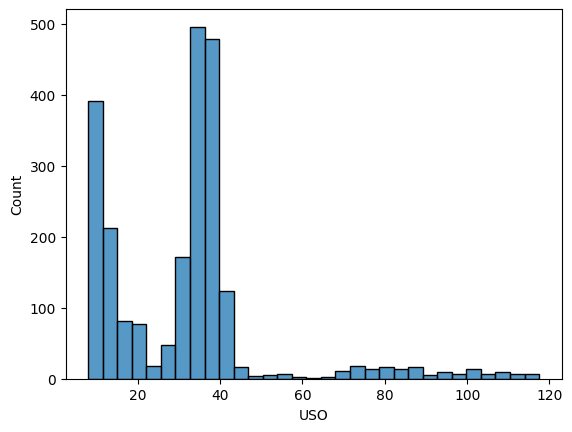

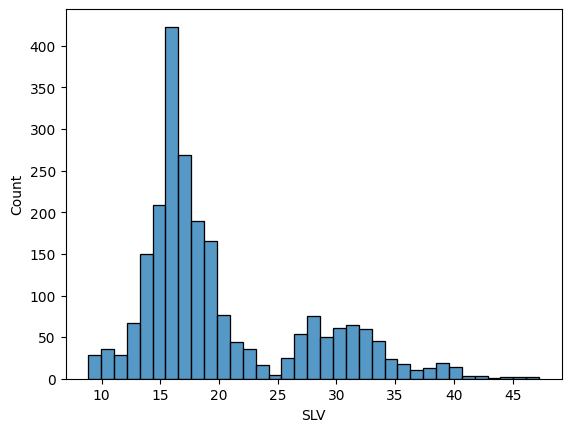

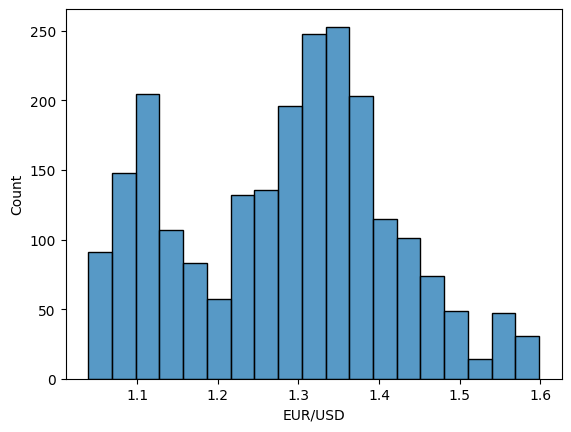

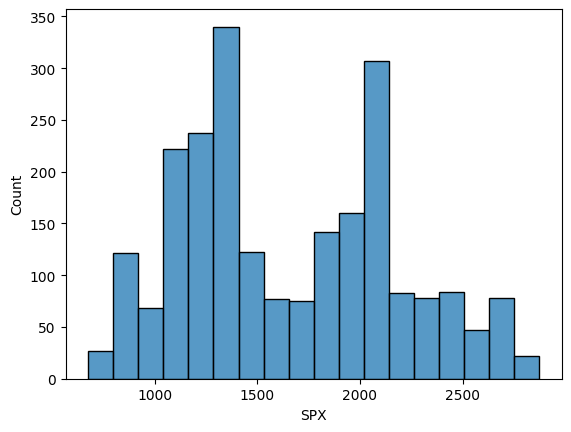

In [14]:
for i in ['USO', 'SLV', 'EUR/USD','SPX']:
  sns.histplot(df[i])
  plt.show()


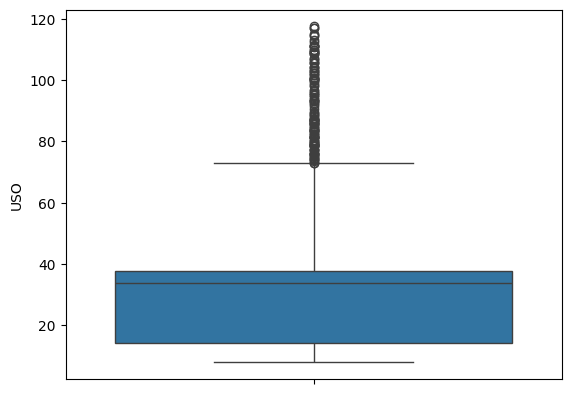

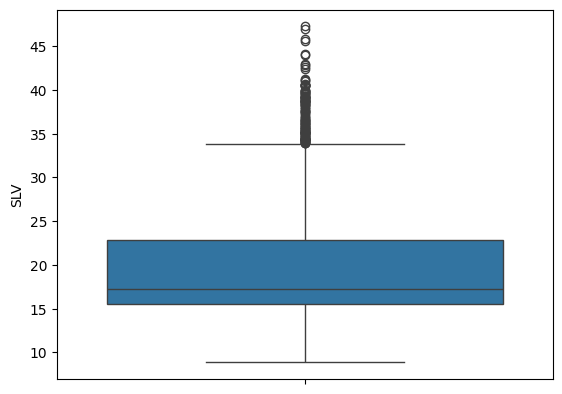

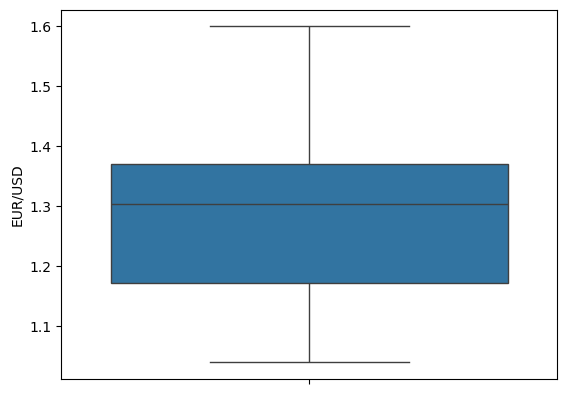

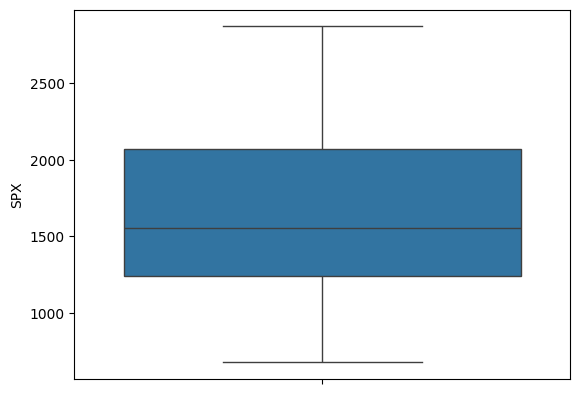

In [19]:
for i in ['USO', 'SLV', 'EUR/USD','SPX']:
  sns.boxplot(df[i])
  plt.show()

In [26]:
s=df[['SPX','GLD','USO','SLV','EUR/USD']].corr()



<Axes: >

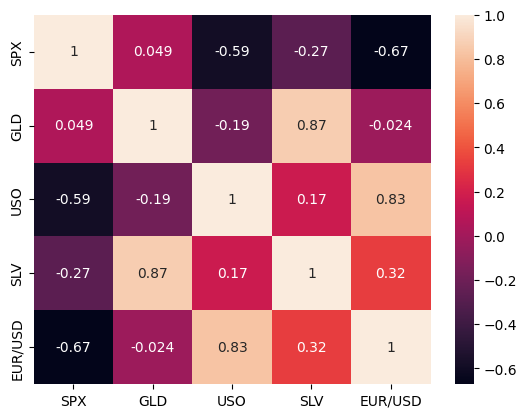

In [27]:
sns.heatmap(s,annot=True)

In [21]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

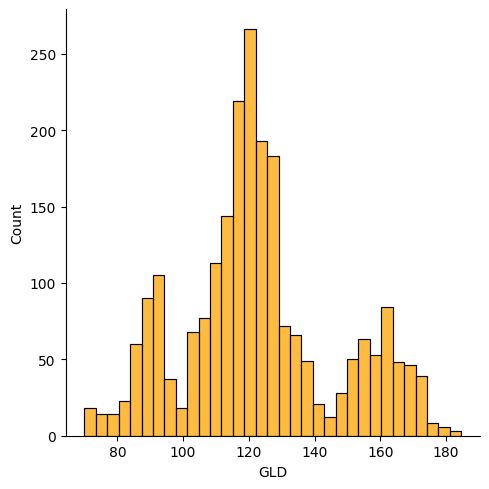

In [30]:
sns.displot(df['GLD'],color='orange')

In [31]:
df.head()

Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

In [32]:
def out(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  up=q3+1.5*iqr
  return lw,up

In [35]:
out(df['SPX'])

(-9.827682624999852, 3322.712722375)

In [38]:
for i in ['USO','SLV']:
  lw,up=out(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>up,up,df[i])

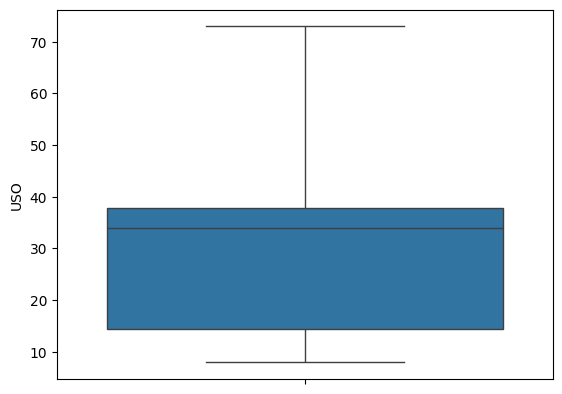

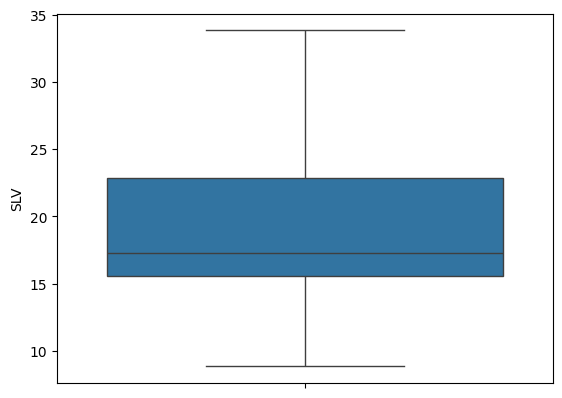

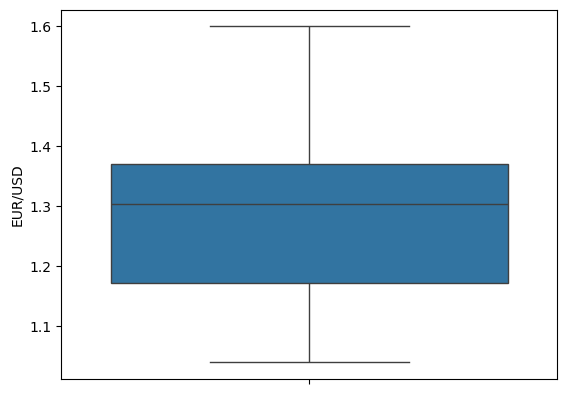

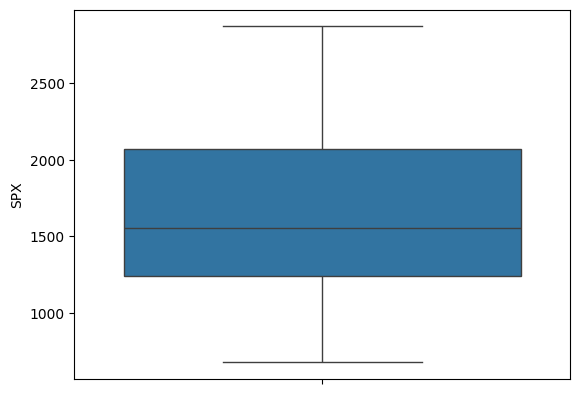

In [39]:
for i in ['USO', 'SLV', 'EUR/USD','SPX']:
  sns.boxplot(df[i])
  plt.show()

In [42]:
x=df.drop(['Date','GLD'],axis='columns')

In [43]:
y=df['GLD']

In [40]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
x_tarin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

def find_best_model_using_gridsearchcv(x,y):
  algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                #'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[1,5,10]
            }
        }

    }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

model  best_score  \
0  linear_regression    0.913569   
1              lasso    0.913104   
2      decision_tree    0.979814   
3      random_forest    0.989159   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...  
3                               {'n_estimators': 10}

In [55]:
model=RandomForestRegressor(n_estimators=10)
model.fit(x_tarin,y_train)

RandomForestRegressor(n_estimators=10)

In [56]:
model.score(x_test,y_test)

0.9856007909255691